<a href="https://colab.research.google.com/github/Freireg/SpeechRecognition/blob/main/VoiceClassification_RPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np
from google.colab import drive

In [91]:
#drive.mount('Machine_Learning_Dataset')
dataset_path = '/content/Machine_Learning_Dataset/MyDrive/Machine_Learning_Dataset/Datasets'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['follow', 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'zero']


In [92]:
# Settings
feature_sets_path = '/content/Machine_Learning_Dataset/MyDrive/Machine_Learning_Dataset/all_targets_mfcc_sets.npz'
feature_sets_filename = '/content/Machine_Learning_Dataset/MyDrive/Machine_Learning_Dataset/all_targets_mfcc_sets.npz'
model_filename = '/content/Machine_Learning_Dataset/MyDrive/Machine_Learning_Dataset/wake_word_follow_model.h5'
wake_word = 'follow'

In [93]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [94]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [95]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7107, 16, 16)
(901, 16, 16)
(884, 16, 16)


In [96]:
# Peek at labels
print(y_val)

[5. 0. 2. 2. 4. 4. 5. 0. 4. 3. 0. 1. 5. 5. 4. 3. 5. 2. 0. 4. 1. 4. 5. 3.
 4. 3. 0. 4. 2. 2. 2. 4. 3. 5. 0. 3. 2. 5. 2. 5. 2. 3. 0. 2. 5. 3. 5. 0.
 5. 5. 4. 0. 3. 2. 0. 5. 4. 3. 0. 5. 4. 0. 1. 5. 4. 0. 2. 0. 4. 3. 0. 4.
 0. 4. 4. 2. 0. 3. 0. 0. 2. 5. 2. 3. 4. 5. 3. 2. 4. 5. 2. 4. 0. 2. 4. 0.
 5. 5. 2. 5. 0. 5. 4. 2. 5. 5. 0. 5. 4. 5. 1. 4. 2. 5. 5. 4. 4. 4. 0. 4.
 3. 5. 5. 3. 2. 3. 3. 5. 4. 0. 3. 0. 5. 0. 4. 5. 2. 0. 5. 5. 0. 4. 5. 5.
 3. 0. 5. 2. 2. 0. 0. 0. 0. 2. 4. 5. 2. 5. 2. 2. 4. 0. 3. 3. 4. 5. 2. 2.
 2. 3. 0. 3. 0. 2. 5. 2. 5. 4. 0. 3. 0. 4. 0. 4. 3. 2. 2. 3. 3. 5. 5. 4.
 3. 5. 3. 4. 3. 2. 3. 1. 4. 0. 3. 0. 4. 4. 3. 5. 0. 2. 5. 0. 0. 4. 0. 0.
 5. 5. 4. 4. 3. 0. 2. 0. 2. 5. 3. 2. 2. 4. 1. 4. 0. 4. 5. 5. 3. 3. 4. 5.
 4. 2. 4. 3. 0. 0. 0. 3. 4. 3. 1. 4. 0. 3. 5. 2. 4. 5. 4. 0. 2. 4. 4. 5.
 4. 4. 5. 3. 5. 2. 2. 4. 3. 0. 0. 3. 3. 3. 3. 2. 4. 3. 1. 3. 4. 3. 4. 3.
 0. 0. 0. 2. 4. 2. 3. 1. 4. 0. 2. 0. 4. 4. 5. 3. 5. 5. 2. 0. 4. 2. 2. 1.
 2. 4. 5. 3. 4. 3. 0. 4. 5. 2. 5. 5. 4. 3. 4. 2. 0.

In [97]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [98]:
# Peek at labels after conversion
print(y_val)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [99]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.17425083240843509
0.8257491675915649


In [100]:
# View the dimensions of our input data
print(x_train.shape)

(7107, 16, 16)


In [101]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7107, 16, 16, 1)
(901, 16, 16, 1)
(884, 16, 16, 1)


In [102]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [103]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [104]:
# Display model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [105]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [106]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
72/72 [==============================] - 4s 40ms/step - loss: 0.4519 - acc: 0.8255 - val_loss: 0.3094 - val_acc: 0.8901
Epoch 2/30
72/72 [==============================] - 3s 38ms/step - loss: 0.2792 - acc: 0.8928 - val_loss: 0.2489 - val_acc: 0.9145
Epoch 3/30
72/72 [==============================] - 3s 38ms/step - loss: 0.2083 - acc: 0.9242 - val_loss: 0.1583 - val_acc: 0.9467
Epoch 4/30
72/72 [==============================] - 3s 39ms/step - loss: 0.1720 - acc: 0.9356 - val_loss: 0.2014 - val_acc: 0.9334
Epoch 5/30
72/72 [==============================] - 3s 40ms/step - loss: 0.1429 - acc: 0.9491 - val_loss: 0.2035 - val_acc: 0.9079
Epoch 6/30
72/72 [==============================] - 3s 37ms/step - loss: 0.1309 - acc: 0.9530 - val_loss: 0.2576 - val_acc: 0.9179
Epoch 7/30
72/72 [==============================] - 3s 40ms/step - loss: 0.1100 - acc: 0.9592 - val_loss: 0.1163 - val_acc: 0.9656
Epoch 8/30
72/72 [==============================] - 3s 41ms/step - loss: 0.1056 - a

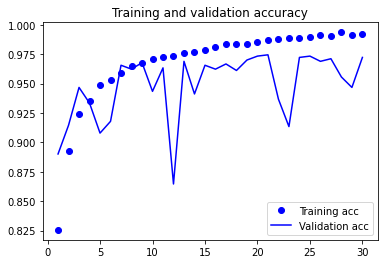

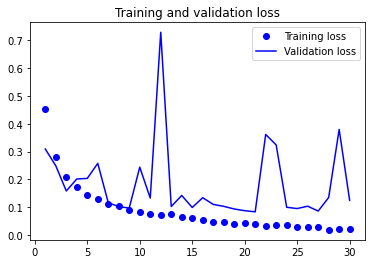

In [107]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [108]:
# Save the model as a file
models.save_model(model, model_filename)

In [109]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

3
12
14
22
29
51
62
65
66
67
72
82
84
89
90
91
92
97
105
117
125
129
144
146
162
173
187
189
192
195
199
210
211
222
230
245
247
248
252
256
264
269
270
273
282
286
287
306
307
309
310
315
325
338
345
353
356
359
362
369
371
372
373
374
378
385
386
399
400
401
413
418
426
437
442
470
471
476
486
490
493
495
499
501
502
519
522
538
539
557
564
574
576
578
582
585
588
598
603
606
607
611
614
619
621
624
638
642
646
651
658
659
660
663
664
668
674
679
687
695
703
705
712
718
725
728
730
740
744
758
771
777
783
787
802
820
827
828
829
832
838
848
850
853
856
864
866


In [110]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 0.0  Prediction: [[2.249372e-07]]
Answer: 0.0  Prediction: [[1.4669543e-11]]
Answer: 0.0  Prediction: [[2.0393953e-09]]
Answer: 0.0  Prediction: [[5.3752613e-10]]
Answer: 0.0  Prediction: [[7.5677085e-06]]
Answer: 1.0  Prediction: [[0.9999942]]
Answer: 0.0  Prediction: [[1.31247365e-11]]
Answer: 0.0  Prediction: [[7.422226e-14]]
Answer: 0.0  Prediction: [[7.651901e-11]]
Answer: 0.0  Prediction: [[7.0681144e-10]]


In [111]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

28/28 [==============================] - 0s 4ms/step - loss: 0.1668 - acc: 0.9808


[0.16680127382278442, 0.9807692170143127]

In [112]:
from tensorflow import lite
from tensorflow.keras import models

In [113]:
# Parameters
keras_model_filename = '/content/Machine_Learning_Dataset/MyDrive/Machine_Learning_Dataset/wake_word_follow_model.h5'
tflite_filename = '/content/Machine_Learning_Dataset/MyDrive/Machine_Learning_Dataset/wake_word_follow_lite.tflite'

In [114]:
# Convert model to TF Lite model
model = models.load_model(keras_model_filename)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(tflite_filename, 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptevrjvx3/assets


INFO:tensorflow:Assets written to: /tmp/tmptevrjvx3/assets


70788